<a href="https://colab.research.google.com/github/rraghavkaushik/DCGAN/blob/main/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

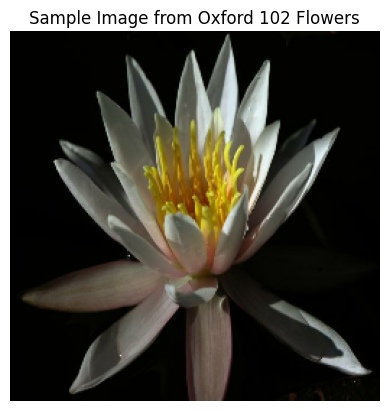

In [23]:
import tensorflow as tf
import tensorflow_datasets as tfds

dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

def preprocess(image, label):
    image = tf.image.resize(image, (256, 256))
    image = image / 255.0
    return image, label
train_dataset = dataset['train'].map(preprocess)
for image, label in train_dataset.take(1):
    plt.imshow(image)
    plt.title(f'Sample Image from Oxford 102 Flowers')
    plt.axis('off')
    plt.show()


In [19]:
from keras.models import Sequential
from keras.initializers import RandomNormal
from keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, Flatten, Dense

def discriminator():
  initializer = RandomNormal(mean = 0.0, stddev = 0.02)
  disc = Sequential()
  disc.add(Input(shape = (128, 128, 3)))
  disc.add(Conv2D(filters = 64, kernel_size = (5, 5), strides = (2, 2), padding = 'same', use_bias = False, kernel_initializer = initializer))
  disc.add(BatchNormalization())
  disc.add(LeakyReLU(0.2))
  disc.add(Conv2D(filters = 128, kernel_size = (5, 5), strides = (2, 2), padding = 'same', use_bias = False, kernel_initializer = initializer))
  disc.add(BatchNormalization())
  disc.add(LeakyReLU(0.2))
  disc.add(Conv2D(filters = 256, kernel_size = (5, 5), strides = (2, 2), padding = 'same', use_bias = False, kernel_initializer = initializer))
  disc.add(BatchNormalization())
  disc.add(LeakyReLU(0.2))
  disc.add(Conv2D(filters = 512, kernel_size = (5, 5), strides = (2, 2), padding = 'same', use_bias = False, kernel_initializer = initializer))
  disc.add(BatchNormalization())
  disc.add(LeakyReLU(0.2))
  disc.add(Conv2D(filters = 1024, kernel_size = (5, 5), strides = (2, 2), padding = 'same', use_bias = False, kernel_initializer = initializer))
  disc.add(BatchNormalization())
  disc.add(LeakyReLU(0.2))
  disc.add(Flatten())
  disc.add(Dense(units = 1, activation = 'sigmoid'))
  return disc
model = discriminator()
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 64, 64, 64)          │           4,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 128)         │         204,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 256)         │         819,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 8, 8, 512)           │       3,276,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 8, 8, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 4, 4, 1024)          │      13,107,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 4, 4, 1024)          │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_14 (LeakyReLU)           │ (None, 4, 4, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │          16,385 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,437,121 (66.52 MB)

 Trainable params: 17,433,153 (66.50 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [28]:
import tensorflow as tf
from keras.initializers import RandomNormal
from keras.models import Sequential
from keras.layers import Input, Dense, Reshape, Conv2DTranspose, BatchNormalization, ReLU

def generator(img_dim):
  initializer = RandomNormal(mean = 0.0, stddev = 0.02)
  gen = Sequential()
  gen.add(Input(shape = (img_dim, )))
  gen.add(Dense(units = 8 * 8 *1024))
  gen.add(Reshape((8, 8, 1024)))
  gen.add(Conv2DTranspose(filters = 512, kernel_size = (5, 5), strides = (2, 2), padding = 'same', use_bias = False, kernel_initializer = initializer))
  gen.add(BatchNormalization())
  gen.add(ReLU())
  gen.add(Conv2DTranspose(filters = 256, kernel_size = (5, 5), strides = (2, 2), padding = 'same', use_bias = False, kernel_initializer = initializer))
  gen.add(BatchNormalization())
  gen.add(ReLU())
  gen.add(Conv2DTranspose(filters = 128, kernel_size = (5, 5), strides = (2, 2), padding = 'same', use_bias = False, kernel_initializer = initializer))
  gen.add(BatchNormalization())
  gen.add(ReLU())
  gen.add(Conv2DTranspose(filters = 64, kernel_size = (5, 5), strides = (2, 2), padding = 'same', use_bias = False, kernel_initializer = initializer))
  gen.add(BatchNormalization())
  gen.add(ReLU())
  output = Conv2D(filters = 3, kernel_size = (5, 5), strides = (1, 1), padding = 'same', use_bias = False, kernel_initializer = initializer, activation = 'tanh')
  gen.add(output)
  return gen


DATASET LOADER AND AUGMENTATION

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_datasets as tfds


In [34]:

dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
train_dataset = dataset['train']


In [35]:

IMG_SIZE = 128
BATCH_SIZE = 128

def preprocess_and_augment(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize to 128x128
    image = tf.image.random_flip_left_right(image)  # Randomly flip the image horizontally
    image = tf.image.random_brightness(image, max_delta=0.1)  # Randomly adjust brightness
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)  # Randomly adjust contrast
    image = tf.cast(image, tf.float32)
    image = (image - 127.5) / 127.5  # Normalize to [-1, 1]
    return image, label

train_dataset = train_dataset.map(preprocess_and_augment, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)


In [39]:
binary_cross_entropy = tf.keras.losses.BinaryCrossentropy()
gen_optimizer = disc_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

def generator_loss(label, fake_output):
    gen_loss = binary_cross_entropy(label, fake_output)
    return gen_loss


def discriminator_loss(label, output):
    disc_loss = binary_cross_entropy(label, output)
    return disc_loss

In [40]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, LATENT_DIM])
    images = preprocess_and_augment(images, label=None)[0]

    with tf.GradientTape() as disc_tape1:
        real_output = discriminator(images, training=True)
        real_targets = tf.ones_like(real_output) * 0.9
        disc_loss1 = discriminator_loss(real_targets, real_output)

    gradients_disc1 = disc_tape1.gradient(disc_loss1, discriminator.trainable_variables)
    disc_optimizer.apply_gradients(zip(gradients_disc1, discriminator.trainable_variables))

    with tf.GradientTape() as disc_tape2:
        generated_images = generator(noise, training=True)
        generated_images = preprocess_and_augment(generated_images, label=None)[0]

        fake_output = discriminator(generated_images, training=True)
        fake_targets = tf.zeros_like(fake_output)
        disc_loss2 = discriminator_loss(fake_targets, fake_output)

    gradients_disc2 = disc_tape2.gradient(disc_loss2, discriminator.trainable_variables)
    disc_optimizer.apply_gradients(zip(gradients_disc2, discriminator.trainable_variables))

    with tf.GradientTape() as gen_tape:
        generated_images = generator(noise, training=True)
        generated_images = preprocess_and_augment(generated_images, label=None)[0]
        fake_output = discriminator(generated_images, training=True)
        real_targets = tf.ones_like(fake_output)
        gen_loss = generator_loss(fake_output)

    gradients_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gen_optimizer.apply_gradients(zip(gradients_gen, generator.trainable_variables))

    return disc_loss1 + disc_loss2, gen_loss


In [41]:
import os
from tqdm import tqdm

generated_images_folder = "generated_images/"
trained_models_folder = "trained_models/"

os.makedirs(generated_images_folder, exist_ok=True)
os.makedirs(trained_models_folder, exist_ok=True)

seed = tf.random.normal([25, LATENT_DIM])

disc_losses = []
gen_losses = []

def train(dataset, epochs):
    generate_and_save_images(generator, 0, seed)
    discriminator.save(os.path.join(trained_models_folder, "Discriminator_epoch_0"))
    generator.save(os.path.join(trained_models_folder, "Generator_epoch_0"))
    for epoch in range(epochs):
        disc_loss_total = 0.0
        gen_loss_total = 0.0
        print(f'Currently training on epoch {epoch+1} out of {epochs}.')
        for image_batch in tqdm(dataset):
            disc_loss, gen_loss = train_step(image_batch)
            disc_loss_total += disc_loss
            gen_loss_total += gen_loss
        avg_disc_loss = disc_loss_total / len(dataset)
        avg_gen_loss = gen_loss_total / len(dataset)
        disc_losses.append(avg_disc_loss.numpy())
        gen_losses.append(avg_gen_loss.numpy())
        generate_and_save_images(generator, epoch+1, seed)
        if (epoch + 1) % 100 == 0:
            discriminator.save(os.path.join(trained_models_folder, f"Discriminator_epoch_{epoch+1}"))
            generator.save(os.path.join(trained_models_folder, f"Generator_epoch_{epoch+1}"))


    generate_and_save_images(generator, epochs, seed)
    discriminator.save(os.path.join(trained_models_folder, f"Discriminator_epoch_{epochs}"))
    generator.save(os.path.join(trained_models_folder, f"Generator_epoch_{epochs}"))


NameError: name 'LATENT_DIM' is not defined